In [1]:
import got 
import ot
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
%matplotlib inline

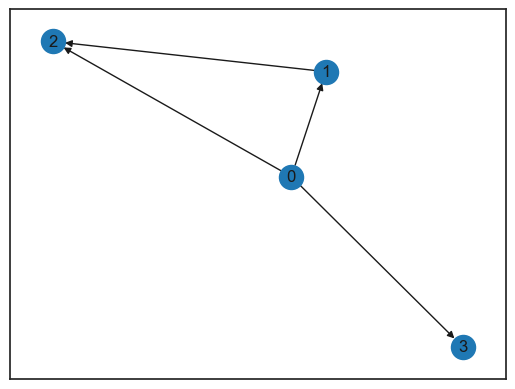

In [2]:
# Web A would have: 
# 0: lion, 1: caracal, 2: cape ground squirrel, and 3: hartebeest
G1 = nx.DiGraph([(0, 1), (0, 2), (0, 3), (1, 2)])
# Web B would have:
# 0: leopard, 1: honey badger, 2: cape spring hare, and 3: zebra
G2 = G1.copy()
nx.draw_networkx(G1)

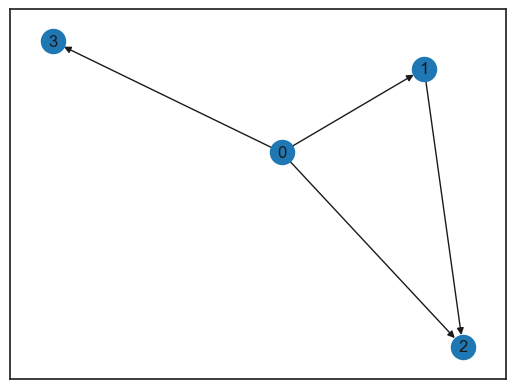

In [3]:
nx.draw_networkx(G2)

In [4]:
G1_ot = got.GraphOT(G1, "uniform")
G2_ot = got.GraphOT(G2, "uniform")

T, log = ot.gromov_wasserstein(G1_ot.get_cost(), G2_ot.get_cost(), G1_ot.get_node_dist(), G2_ot.get_node_dist(), log=True)

<Axes: >

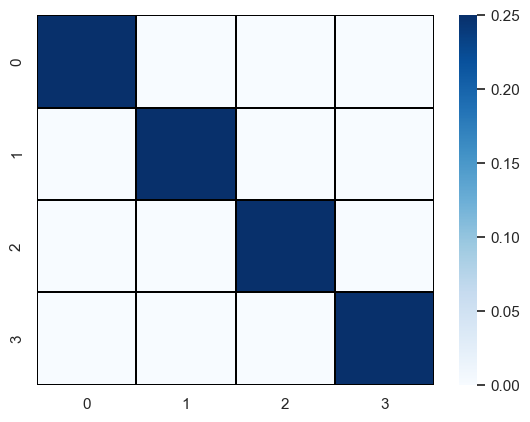

In [5]:
sns.heatmap(T, cmap="Blues", linewidths=0.1, linecolor="black", xticklabels=1, yticklabels=1)

In [6]:
log["gw_dist"]

0.0

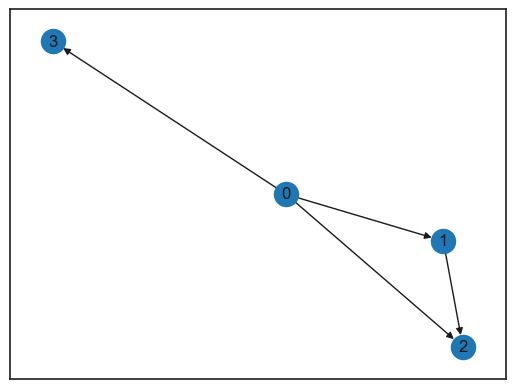

In [7]:
nx.draw_networkx(G1)

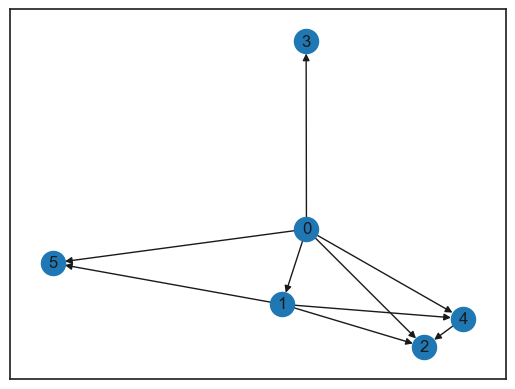

In [8]:
# Expanded version of web B to differentiate from web A, which includes 
# leopard, honey badger, jackal, zebra, porcupine, cape spring hare.
# In particular, the new species introduced are the jackal and porcupine. 
# The new links are 
#  jackal: leopard -> jackal, honey badger -> jackal, jackal -> hare
#  porcupine: leopard -> porcupine, honey badger -> porcupine

# Recall that the numbering of the nodes are 
# 0: leopard, 1: honey badger, 2: cape spring hare, and 3: zebra
# We let 4 represent the jackal and 6 represent the porcupine, so we 
# add the links (0, 4), (1, 4), (4, 2), (0, 5), (1, 5) to the graph.

G2.add_edges_from([(0, 4), (1, 4), (4, 2), (0, 5), (1, 5)]) # web B
nx.draw_networkx(G2)

<Axes: >

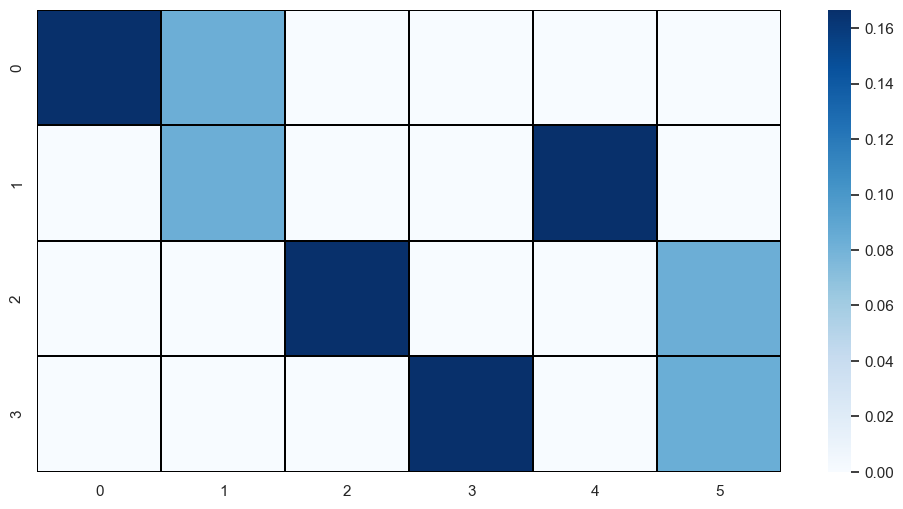

In [9]:
G2_ot = got.GraphOT(G2, "uniform")
T, log = ot.gromov_wasserstein(G1_ot.get_cost(), G2_ot.get_cost(), G1_ot.get_node_dist(), G2_ot.get_node_dist(), log=True)
plt.figure(figsize=(12, 6))
sns.heatmap(T, cmap="Blues", linewidths=0.1, linecolor="black", xticklabels=1, yticklabels=1)

In [10]:
GW_dist = log["gw_dist"]
print(np.log(GW_dist))

11.840929907150581


<Axes: >

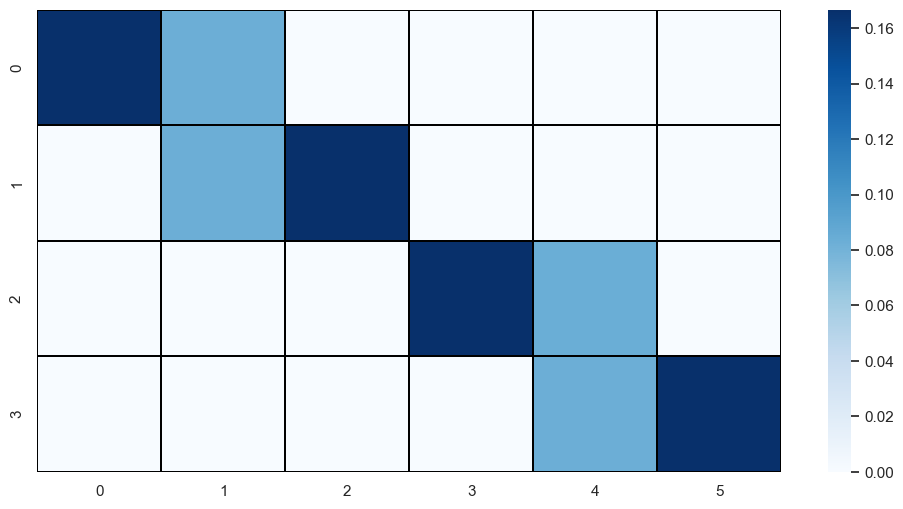

In [ ]:
# Swap the rows and columns to be consistent with the group by predator then
# by body weight. In particular
# web A: lion, caracal, hartebeest, squirrel
# web B: leopard, honey badger, jackal, zebra, porcupine, spring hare

# rearrange the rows so that Hartebeest (2) and Squirrel (3) are swapped
# effectively, swap row 2 and row 3 of T
T[[2, 3], :] = T[[3, 2], :]
# then swap column 2 and column 4
T[:, [2, 4]] = T[:, [4, 2]]
# lastly swap columns 4 and column 5
T[:, [4, 5]] = T[:, [5, 4]]
plt.figure(figsize=(12, 6))
sns.heatmap(T, cmap="Blues", linewidths=0.1, linecolor="black", xticklabels=1, yticklabels=1)

# note that this does not need to be done for the first transport plan since 
# switching 2 and 3 on both rows and columns there still yields and identity matrix